In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg

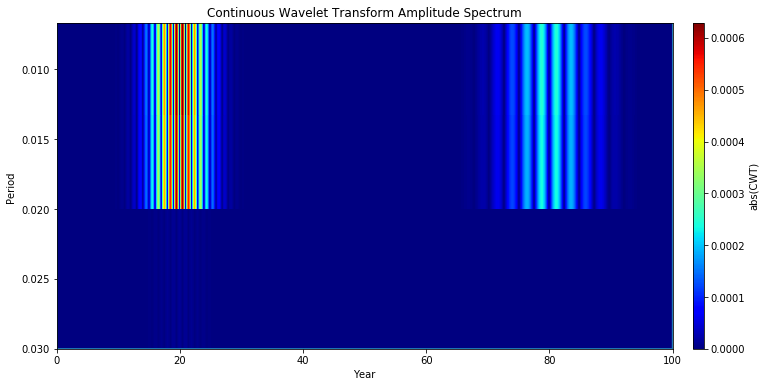

In [36]:
scales = np.linspace(1, 3, num=200, dtype=np.int32)
ax = scg.cws(x, y, scales, figsize=(12,6), ylabel="Period ", xlabel='Year')

# FFT

[Discrete Fourier Transform](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) can be done by `numpy.fft.fft`

Let us define the following function:
$$
    f(x)=A_1 cos(2\pi \nu_1 x+\phi_1) + A_2 cos(2\pi \nu_2 x+\phi_2) + A_3 cos(2\pi \nu_3 x+\phi_3)
$$

In [113]:
def wave_signal(params,x):
    amp1=params['amp1']
    freq1=params['freq1']
    phase1=params['phase1']

    amp2=params['amp2']
    freq2=params['freq2']
    phase2=params['phase2']

    amp3=params['amp3']
    freq3=params['freq3']
    phase3=params['phase3']

    y1 = amp1*np.cos(2*np.pi*freq1*x+phase1)
    y2 = amp2*np.cos(2*np.pi*freq2*x+phase2)
    y3 = amp3*np.cos(2*np.pi*freq3*x+phase3)

    return y1+y2+y3

## Reference signal

$$
    f_{ref}(x)= cos(2\pi (0.05) x) + 0.5 cos(2\pi (0.1) x)
$$

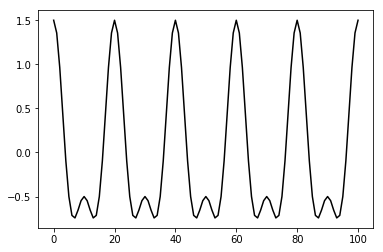

In [438]:
params={
    'amp1':1,
    'freq1':0.05,
    'phase1':0,
    'amp2':0.5,
    'freq2':0.1,
    'phase2':0,
    'amp3':0.0,
    'freq3':0.0,
    'phase3':0,
}

N=101

x=np.linspace(0,100,N)
dx=x[1]-x[0]
y=wave_signal(params,x)

plt.plot(x,y,'k')
plt.show()

Because the number of samples is not sufficient, you can see that the curve is not so smooth. Let us perform the [discrete Fourier transform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html) to this signal. 

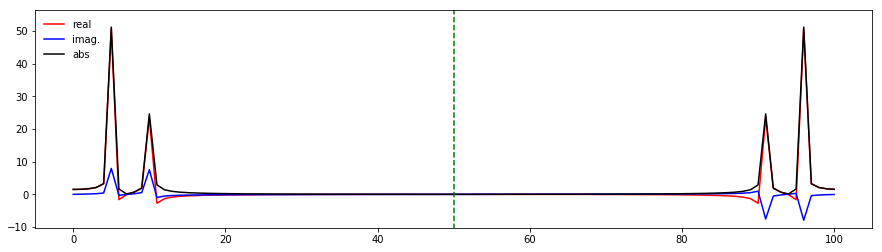

In [222]:
FY=np.fft.fft(y) # FFT
n=int(N/2)  

plt.figure(figsize=(15,4))
plt.plot(np.real(FY), color='r', label='real') # absolute value of FT signal
plt.plot(np.imag(FY), color='b', label='imag.') # absolute value of FT signal
plt.plot(np.abs(FY), color='k', label='abs') # absolute value of FT signal
plt.legend(loc='upper left',frameon=False)

plt.plot(np.array([n,n]),np.array([-np.abs(FY).max(),2*np.abs(FY).max()]), '--',color='green') # separation line
plt.ylim([-np.abs(FY).max()/5,np.abs(FY).max()+np.abs(FY).max()/10]) 
plt.show()

The red, blue, and black lines show the real part, imaginary part, and absolute value, respectively. Only the left side with respect to the green line is a valid signal.

[numpy.fft.fftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html) returns the Discrete Fourier Transform sample frequencies. 

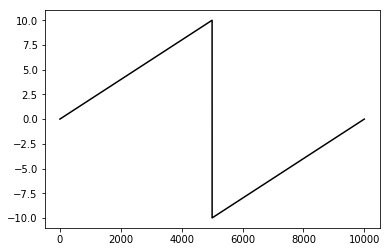

In [255]:
fq=np.fft.fftfreq(N,dx) 
plt.plot(fq,'k')
plt.show()

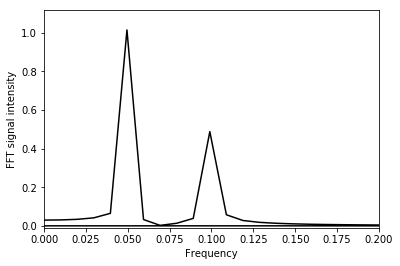

In [439]:
FY=np.fft.fft(y)/N*2 # FFT

fq=np.fft.fftfreq(N,dx)  # frequencies

plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.xlim([0,0.2])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.xlabel('Frequency')
plt.ylabel('FFT signal intensity')
plt.show()

Because the number of samples N is not sufficient, the peaks in the spectrum have broad shoulder.

## Increasing the number of samples N

Since we could not get clear peaks, let us increase the number of samples N.

$$
    f_{2}(x) = f_{ref}(x)= cos(2\pi (0.05) x) + 0.5 cos(2\pi (0.1) x) 
$$

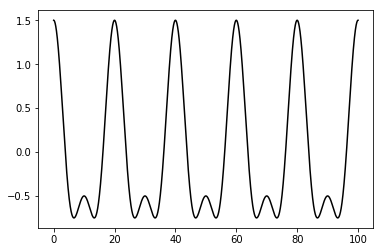

In [440]:
params={
    'amp1':1,
    'freq1':0.05,
    'phase1':0,
    'amp2':0.5,
    'freq2':0.1,
    'phase2':0,
    'amp3':0.0,
    'freq3':0.0,
    'phase3':0,
}

N=10001
n=int(N/2)

x=np.linspace(0,100,N)
dx=x[1]-x[0]
y=wave_signal(params,x)

plt.plot(x,y,'k')
plt.show()

The obtained curve looks much smoother than before.

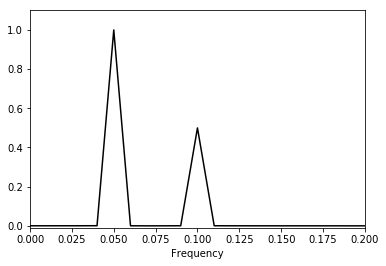

In [441]:
FY=np.fft.fft(y)/N*2 # FFT

fq=np.fft.fftfreq(N,dx) # frequencies

plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.xlim([0,0.2])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.xlabel('Frequency')
plt.show()

As you can see, the observed peaks have no shoulders.

## Increasing the number of periods

$$
    f_{3}(x) = f_{ref}(x)= cos(2\pi (0.05) x) + 0.5 cos(2\pi (0.1) x) 
$$

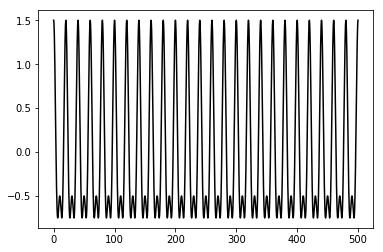

In [251]:
params={
    'amp1':1,
    'freq1':0.05,
    'phase1':0,
    'amp2':0.5,
    'freq2':0.1,
    'phase2':0,
    'amp3':0.0,
    'freq3':0.0,
    'phase3':0,
}

N=10001
n=int(N/2)

x=np.linspace(0,500,N)
dx=x[1]-x[0]
y=wave_signal(params,x)

plt.plot(x,y,'k')
plt.show()

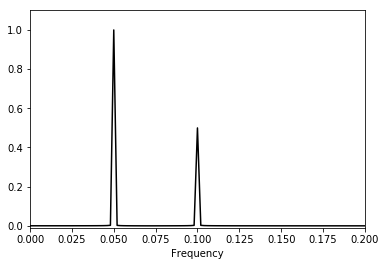

In [253]:
FY=np.fft.fft(y)/N*2

fq=np.fft.fftfreq(N,dx) 

plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.xlim([0,0.2])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.xlabel('Frequency')
plt.show()

After increasing the number of period, the observed peaks become much narrower.

## Different phase
$$
    f_{ref}(x)= cos(2\pi (0.05) x) + 0.5 cos(2\pi (0.1) x) 
$$
$$
    f_{3}(x) = cos(2\pi (0.05) x) + 0.5 cos(2\pi (0.1) x + \pi) 
$$

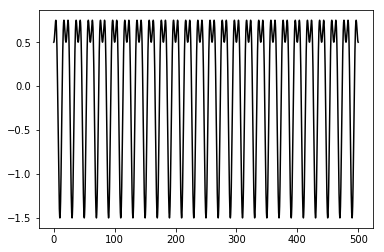

In [257]:
params={
    'amp1':1,
    'freq1':0.05,
    'phase1':0,
    'amp2':0.5,
    'freq2':0.1,
    'phase2':np.pi,
    'amp3':0.0,
    'freq3':0.0,
    'phase3':0,
}

N=10001
n=int(N/2)

x=np.linspace(0,500,N)
dx=x[1]-x[0]
y=wave_signal(params,x)

plt.plot(x,y,'k')
plt.show()

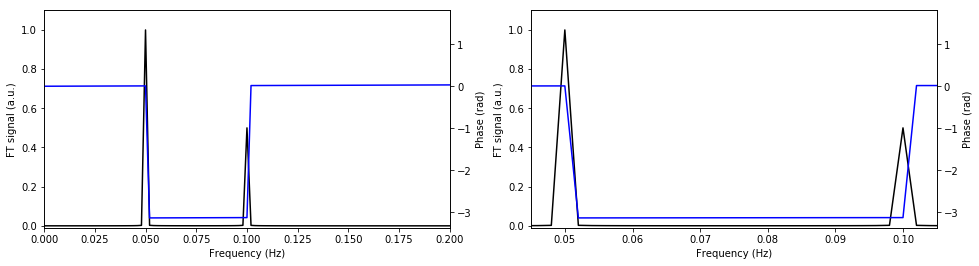

In [270]:
FY=np.fft.fft(y)/N*2

fq=np.fft.fftfreq(N,dx) 

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.xlim([0,0.2])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.ylabel('FT signal (a.u.)')
plt.xlabel('Frequency (Hz)')
plt.twinx()
plt.plot(fq[:n],np.angle(FY/2*N)[:n],color='blue')
plt.ylabel('Phase (rad)')

plt.subplot(122)
plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.xlim([0.045,0.105])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.ylabel('FT signal (a.u.)')
plt.xlabel('Frequency (Hz)')
plt.twinx()
plt.plot(fq[:n],np.angle(FY/2*N)[:n],color='blue')
plt.ylabel('Phase (rad)')


plt.show()

The blue line shows that the phases of the two frequency components are different by &pi;.

## Multiple frequency components

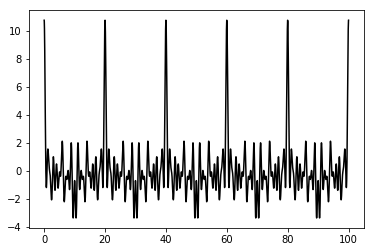

In [442]:
N=100001 # Number of samples
num_waves=20 # number of waves
x=np.linspace(0,100,N)

dx=x[1]-x[0] 
n=int(N/2)

y=np.zeros_like(x) # initialization

np.random.seed(4) # random seed

amp_list=[] # amplitude list
freq_list=[] # frequency list

for j in range(num_waves):
    amp=np.random.rand() # randomly-generated amplitude
    freq=(j+1)*0.05 # frequency
    
    y=amp*np.cos(2*np.pi*freq*x)+y
    
    amp_list.append(amp) 
    freq_list.append(freq)
    
plt.plot(x,y,'k')
plt.show()

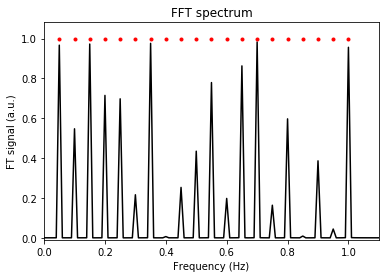

In [443]:
from scipy.signal import find_peaks

FY=np.fft.fft(y)/N*2 # fft signal
idx=find_peaks(np.abs(FY)[:n])[0] # peak index

fq=np.fft.fftfreq(N,dx)  # frequency

plt.plot(fq[:n],np.abs(FY)[:n], color='k') # FFT spectrum

plt.plot(fq[idx],np.ones_like(idx),'o', markersize=3, color='red') # peak positions

plt.xlim([0,1.1])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('FT signal (a.u.)')
plt.title('FFT spectrum')
plt.show()

Actual frequencies:
 [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]

Frequencies determined from FFT spectrum:
 [0.0499995 0.099999  0.1499985 0.199998  0.2499975 0.299997  0.3499965
 0.399996  0.4499955 0.499995  0.5499945 0.599994  0.6499935 0.699993
 0.7499925 0.799992  0.8499915 0.899991  0.9499905 0.99999  ]


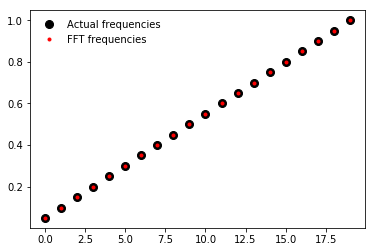

In [407]:
print("Actual frequencies:\n",freq_list)
print("\nFrequencies determined from FFT spectrum:\n",fq[idx])

plt.plot(freq_list,'o',color='black',markersize=8, label='Actual frequencies')
plt.plot(fq[idx],'o',markersize=3,color='red',label='FFT frequencies')
plt.legend(frameon=False)
plt.show()

Peak positions are correct.

Actual amplitudes:
 [0.9670298390136767, 0.5472322491757223, 0.9726843599648843, 0.7148159936743647, 0.6977288245972708, 0.21608949558037638, 0.9762744547762418, 0.006230255204589863, 0.25298236238344396, 0.4347915324044458, 0.7793829217937525, 0.19768507460025309, 0.8629932355992223, 0.9834006771753128, 0.16384224140469872, 0.5973339439328592, 0.008986097667554982, 0.3865712826436294, 0.044160057931499574, 0.9566529677142359]

FFT signal intensity:
 [0.96723946 0.5474415  0.97288188 0.71499026 0.6978802  0.21625775
 0.97640417 0.00634268 0.25316363 0.43498945 0.77951966 0.19783242
 0.86314546 0.98337188 0.16378349 0.59727356 0.00893172 0.38655442
 0.04419364 0.95653911]


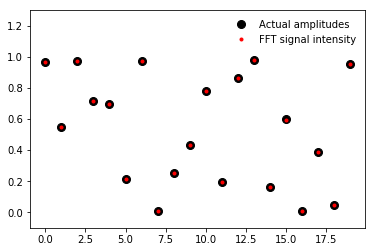

In [422]:
print("Actual amplitudes:\n",amp_list)
print("\nFFT signal intensity:\n",np.abs(FY[idx]))

plt.plot(amp_list, 'o', color='k',markersize=8, label='Actual amplitudes')
plt.plot(np.abs(FY[idx]),'o', color='red', markersize=3, label='FFT signal intensity')
plt.legend(frameon=False)
plt.ylim([-0.1,1.3])
plt.show()

Amplitudes are correct as well.

## Effect of background signal

If you have time-independent background, you will get a strong peak at 0 frequency in a FFT spectrum.

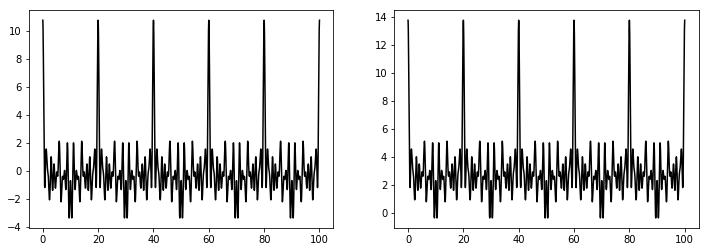

In [430]:
N=100001
num_waves=20 # number of waves
x=np.linspace(0,100,N)
bg=3 # backgorund

dx=x[1]-x[0] 
n=int(N/2)

y=np.zeros_like(x) # initialization

np.random.seed(4) # random seed

amp_list=[] # amplitude list
freq_list=[] # frequency list

for j in range(num_waves):
    amp=np.random.rand() # randomly-generated amplitude
    freq=(j+1)*0.05 # frequency
    
    y=amp*np.cos(2*np.pi*freq*x)+y
    
    amp_list.append(amp) 
    freq_list.append(freq)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x,y,'k')

plt.subplot(122)
y=y+bg
plt.plot(x,y,'k')
plt.show()


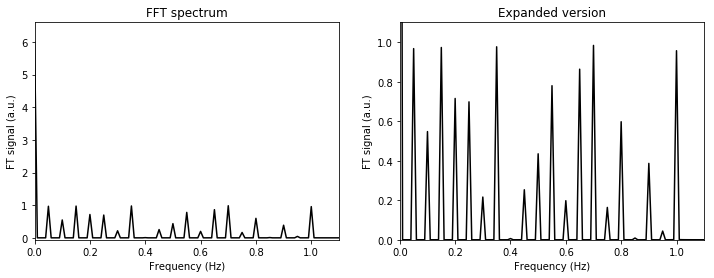

In [437]:
FY=np.fft.fft(y)/N*2 # fft signal

fq=np.fft.fftfreq(N,dx)  # frequency


plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.title('FFT spectrum')
plt.xlim([0,1.1])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('FT signal (a.u.)')

plt.subplot(122)

plt.plot(fq[:n],np.abs(FY)[:n], color='k')
plt.title('Expanded version')
plt.xlim([0,1.1])
plt.ylim([0,1.1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('FT signal (a.u.)')

plt.show()

## FFT on a randomly-cropped signal

If you do not choose right period for data, you cannot get a correct FFT signal.

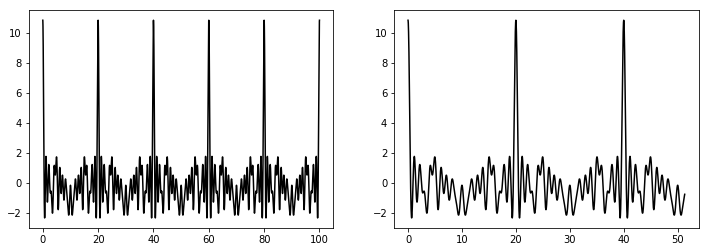

In [521]:
np.random.seed(4) # random seed

N=10001 # sample numbers
Nlim=np.random.randint(5010,5210) # specifies cropping position
num_waves=20 # number of waves
x=np.linspace(0,100,N)

dx=x[1]-x[0] 
n=int(N/2)

y=np.zeros_like(x) # initialization

for j in range(num_waves):
    amp=np.random.rand() # randomly-generated amplitude
    freq=(j+1)*0.05 # frequency
    
    y=amp*np.cos(2*np.pi*freq*x)+y
    

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x,y,'k')

plt.subplot(122)

N=Nlim
n=int(N/2)
x=x[:N]
y=y[:N]

plt.plot(x,y,'k')
plt.show()


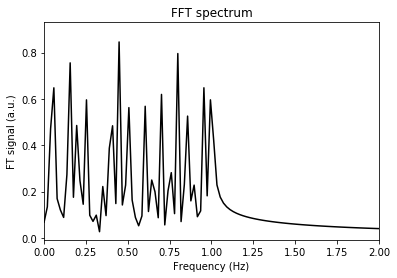

In [509]:
FY=np.fft.fft(y)/N*2 # fft signal

fq=np.fft.fftfreq(N,dx)  # frequency

plt.plot(fq[:n],np.abs(FY)[:n], color='k') # FFT spectrum

plt.xlim([0,2])
plt.ylim([-np.abs(FY).max()/100,np.abs(FY).max()+np.abs(FY).max()/10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('FT signal (a.u.)')
plt.title('FFT spectrum')
plt.show()